In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix



In [87]:
import zipfile
import os

# Extract the training dataset
with zipfile.ZipFile('/content/data.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/data')

In [88]:
import warnings
from pathlib import Path
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
'''from extract_features import extract_features
from feature_selection import (
    feature_importance_random_forest,
    mutual_information_feature_selection,
    recursive_feature_elimination
)'''


ROOT_DIR =  "/content/data/"


exper1_csv = ROOT_DIR + r"acc_gyr_experiment_jab_left_slow.csv"  # Update with the actual path
exper1_df = pd.read_csv(exper1_csv)

exper2_csv = ROOT_DIR + r"acc_gyr_experiment_jab_left_fast.csv"  # Update with the actual path
exper2_df = pd.read_csv(exper2_csv)

exper3_csv = ROOT_DIR + r"acc_gyr_experiment_jab_right_fast.csv"  # Update with the actual path
exper3_df = pd.read_csv(exper3_csv)

exper4_csv = ROOT_DIR + r"acc_gyr_experiment_jab_right_slow.csv"  # Update with the actual path
exper4_df = pd.read_csv(exper4_csv)

exper5_csv = ROOT_DIR +r"acc_gyr_experiment_uppercut_right_slow.csv"  # Update with the actual path
exper5_df = pd.read_csv(exper5_csv)

exper6_csv = ROOT_DIR + r"acc_gyr_experiment_uppercut_right_fast.csv"  # Update with the actual path
exper6_df = pd.read_csv(exper6_csv)

exper7_csv = ROOT_DIR + r"acc_gyr_experiment_uppercut_left_fast.csv"  # Update with the actual path
exper7_df = pd.read_csv(exper7_csv)

exper8_csv = ROOT_DIR + r"acc_gyr_experiment_uppercut_left_slow.csv"  # Update with the actual path
exper8_df = pd.read_csv(exper8_csv)

exper9_csv = ROOT_DIR+ r"acc_gyr_experiment_hook_right_slow.csv"  # Update with the actual path
exper9_df = pd.read_csv(exper9_csv)

exper10_csv = ROOT_DIR+ r"acc_gyr_experiment_hook_right_fast.csv"  # Update with the actual path
exper10_df = pd.read_csv(exper10_csv)

exper11_csv = ROOT_DIR+ r"acc_gyr_experiment_hook_left_fast.csv"  # Update with the actual path
exper11_df = pd.read_csv(exper11_csv)

exper12_csv = ROOT_DIR + r"acc_gyr_experiment_hook_left_slow.csv"  # Update with the actual path
exper12_df = pd.read_csv(exper12_csv)

exper13_csv = ROOT_DIR + r"acc_gyr_experiment_all_right.csv"  # Update with the actual path
exper13_df = pd.read_csv(exper13_csv)

exper14_csv = ROOT_DIR +r"acc_gyr_experiment_all_left.csv"  # Update with the actual path
exper14_df = pd.read_csv(exper14_csv)

sensor_data_df = pd.concat([exper12_df, exper11_df, exper10_df, exper9_df, exper8_df, exper7_df, \
                            exper6_df, exper5_df, exper4_df, exper3_df, exper2_df, exper1_df, exper13_df, exper14_df \
                            ], ignore_index=True)

# Count missing values for each column
missing_values_count = sensor_data_df.isna().sum()
print("Missing values count:", missing_values_count)

# Forward fill empty values in the "label" column
sensor_data_df['label'].fillna(method='ffill', inplace=True)

# Sort the DataFrame by the 'timestamp' column in ascending order
sensor_data_df = sensor_data_df.sort_values(by='timestamp')
# Reset the index to make it sequential
sensor_data_df.reset_index(drop=True, inplace=True)

Missing values count: timestamp          0
seconds_elapsed    0
accZ               0
accY               0
accX               0
gyrZ               0
gyrY               0
gyrX               0
label              0
hand               0
dtype: int64


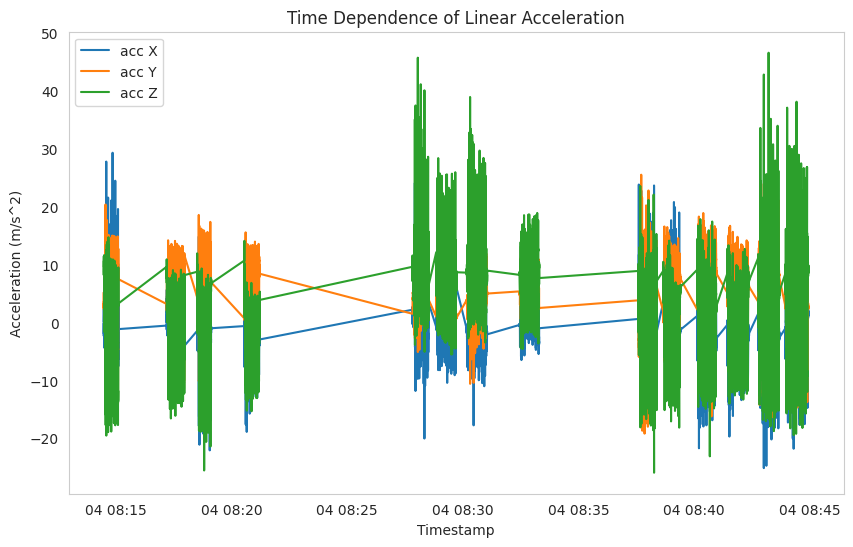

In [89]:
# Define a function to plot sensor data
def plot_sensor_data(df, sensor_type):
    """
    Plot accelerometer or gyroscope data.

    Parameters:
        data (pd.DataFrame): DataFrame containing sensor data.
                             It should have columns: 'timestamp', 'accX', 'accY', 'accZ', 'gyrX', 'gyrY', 'gyrZ'.
        sensor_type (str): The type of sensor data to plot. Either 'acc' or 'gyr'.

    Returns:
        None
    """
    data = df[:]
    data['timestamp'] = pd.to_datetime(data['timestamp'], unit='ns')
    if sensor_type not in ('acc', 'gyr'):
        raise ValueError("Invalid sensor type. Use 'acc' or 'gyr'.")

    plt.figure(figsize=(10, 6))
    plt.plot(data['timestamp'], data[f'{sensor_type}X'], label=f'{sensor_type} X')
    plt.plot(data['timestamp'], data[f'{sensor_type}Y'], label=f'{sensor_type} Y')
    plt.plot(data['timestamp'], data[f'{sensor_type}Z'], label=f'{sensor_type} Z')
    plt.xlabel('Timestamp')
    plt.ylabel('Acceleration (m/s^2)' if sensor_type == 'acc' else 'Angular Velocity (deg/s)')
    plt.title(
        'Time Dependence of Linear Acceleration' if sensor_type == 'acc' else 'Time Dependence of Angular Velocity')
    plt.legend()
    plt.grid()
    plt.show()


plot_sensor_data(sensor_data_df, 'acc')

In [90]:
def calculate_accelerometer_frequency(df_f):
    # Load the data from CSV file into a DataFrame

    df = df_f[:]
    # Convert the timestamp from milliseconds to seconds
    df['timestamp'] = df['timestamp'] / 1e9

    # Calculate the time differences between consecutive timestamps
    df['DeltaTime'] = df['timestamp'].diff()

    # Calculate the accelerometer frequency in hertz
    accelerometer_frequency = 1 / df['DeltaTime'].mean()

    return accelerometer_frequency


frequency_hz = calculate_accelerometer_frequency(exper3_df)
print(f"The accelerometer frequency is approximately {frequency_hz:.2f} Hz")

The accelerometer frequency is approximately 95.34 Hz


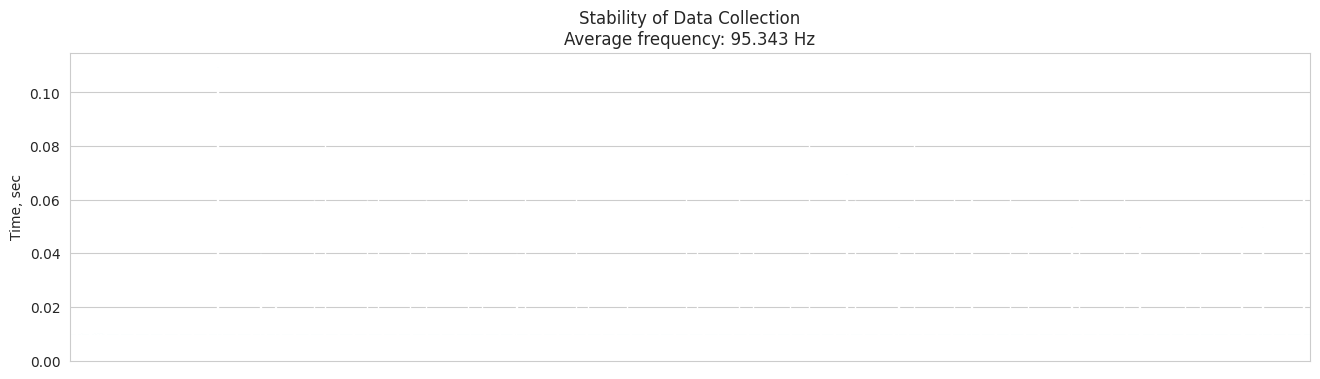

Is 'timestamp' column monotonically increasing 'top'? True
Shape: 63940
Shape: 63940


In [91]:
def plot_stability(time_diffs):
    # Convert the timestamp from milliseconds to seconds
    time_diffs = time_diffs / 1e9
    plt.figure(figsize=(16, 4))
    sns.barplot(x=list(range(len(time_diffs))), y=time_diffs, color='cyan')
    # sns.lineplot(x=list(range(len(time_diffs))), y=time_diffs)

    plt.ylabel('Time, sec')
    plt.xticks([])
    plt.grid(True)
    plt.title('Stability of Data Collection\nAverage frequency: {:.3f} Hz'.format(frequency_hz))
    plt.show()


plot_stability(exper3_df['timestamp'].diff())
print("Is 'timestamp' column monotonically increasing 'top'?", sensor_data_df['timestamp'].is_monotonic_increasing)

print("Shape:", len(sensor_data_df))
sensor_data_df = sensor_data_df.dropna()
print("Shape:", len(sensor_data_df))

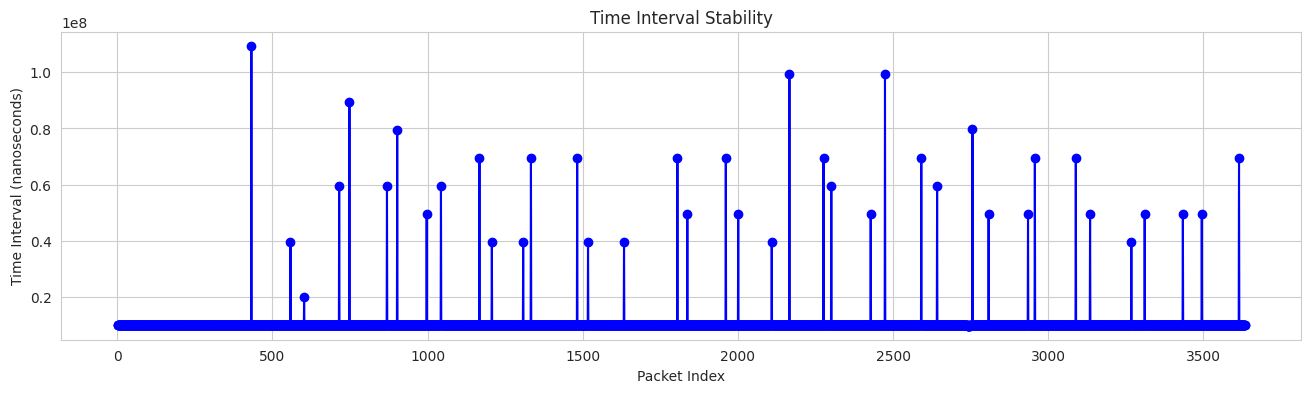

In [92]:
def plot_time_intervals(time_intervals):
    """
    Plot the time intervals to visualize stability.

    Parameters:
        time_intervals (pd.Series): A pandas Series containing time intervals.

    Returns:
        None
    """
    plt.figure(figsize=(16, 4))
    plt.plot(time_intervals, marker='o', linestyle='-', color='b')
    plt.xlabel('Packet Index')
    plt.ylabel('Time Interval (nanoseconds)')
    plt.title('Time Interval Stability')
    plt.grid(True)
    plt.show()


plot_time_intervals(exper3_df['timestamp'].diff())

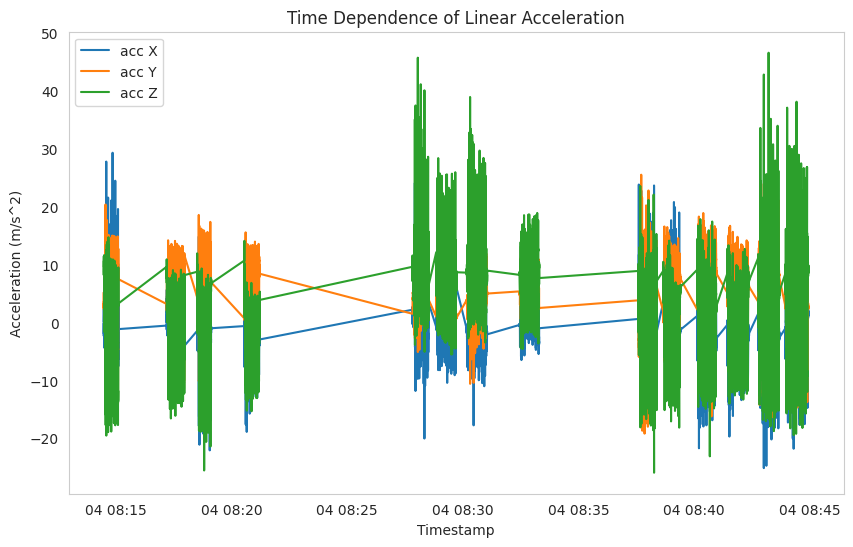

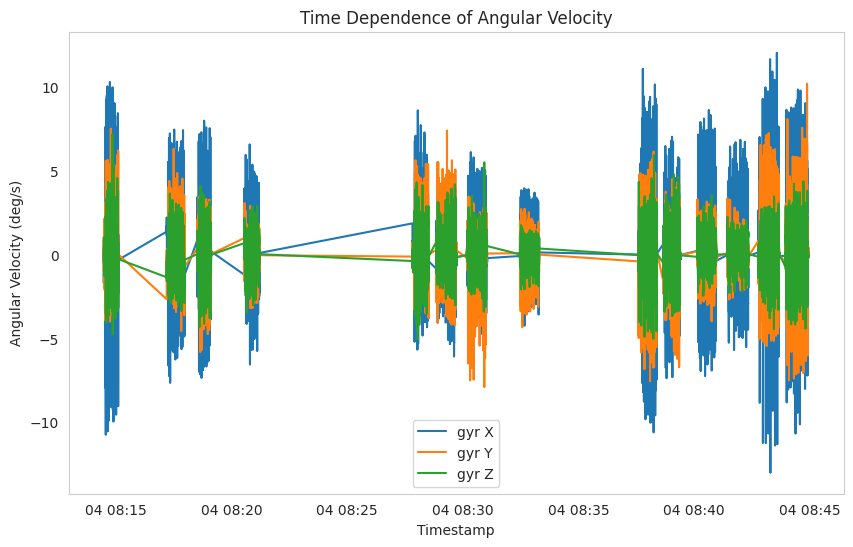

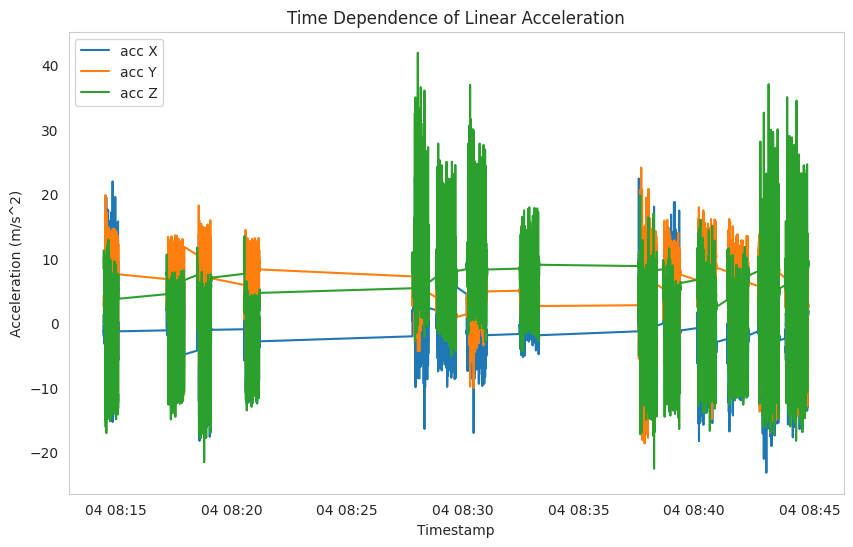

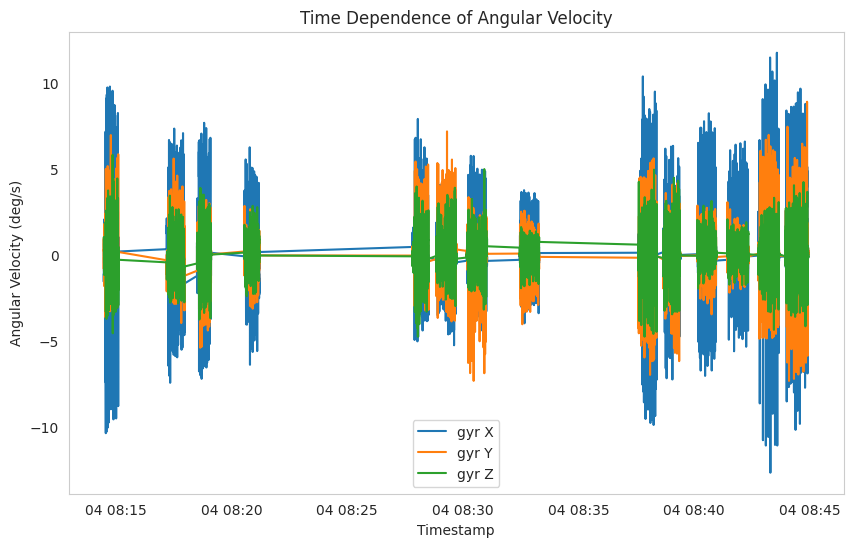

In [93]:
def moving_average_filter(df, accelerometer_cols, gyroscope_cols, window_size):
    """
    Apply a moving average filter to accelerometer and gyroscope data in a DataFrame.

    Parameters:
        df (pd.DataFrame): The input DataFrame containing sensor data.
        accelerometer_cols (list): List of accelerometer column names.
        gyroscope_cols (list): List of gyroscope column names.
        window_size (int): The size of the moving average window.

    Returns:
        pd.DataFrame: A new DataFrame with filtered accelerometer and gyroscope data.
    """
    filtered_df = df.copy()  # Create a copy of the input DataFrame to store the filtered data

    # Apply the moving average filter to accelerometer columns
    for col in accelerometer_cols:
        filtered_df[col] = df[col].rolling(window=window_size, min_periods=1).mean()

    # Apply the moving average filter to gyroscope columns
    for col in gyroscope_cols:
        filtered_df[col] = df[col].rolling(window=window_size, min_periods=1).mean()

    return filtered_df


plot_sensor_data(sensor_data_df,'acc')
plot_sensor_data(sensor_data_df,'gyr')

# Example usage:
# Assuming 'data_df' is your input DataFrame with columns 'timestamp', 'accX', 'accY', 'accZ', 'gyrX', 'gyrY', 'gyrZ'
window_size = 6  # Adjust the window size as needed
filtered_data = moving_average_filter(sensor_data_df, ['accX', 'accY', 'accZ'], ['gyrX', 'gyrY', 'gyrZ'], window_size)
plot_sensor_data(filtered_data,'acc')
plot_sensor_data(filtered_data,'gyr')

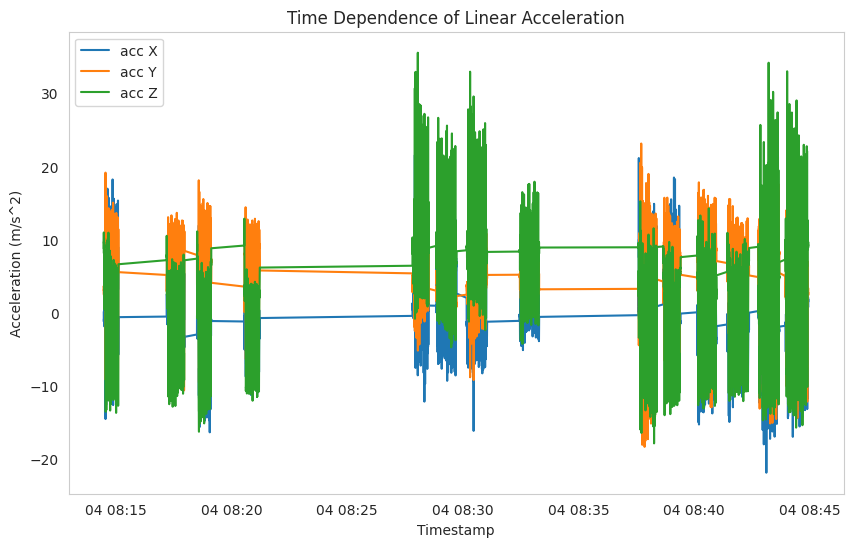

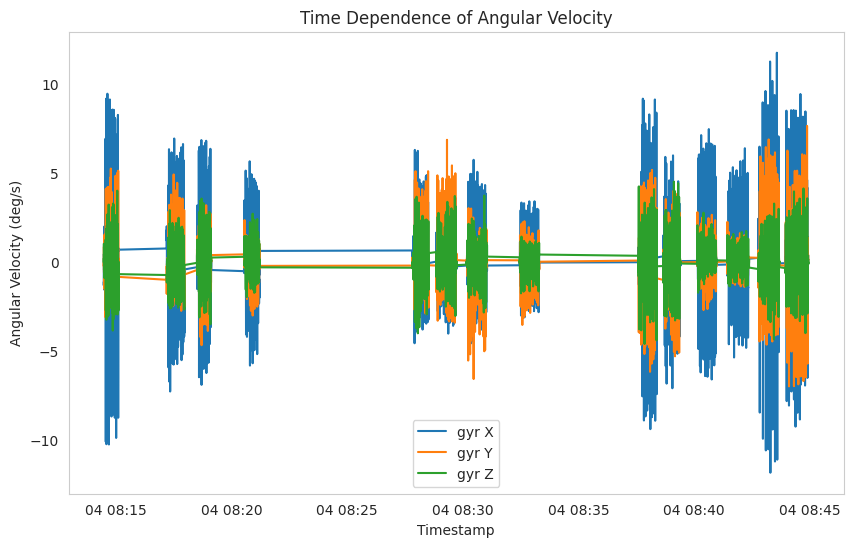

In [94]:
import pandas as pd
from scipy.signal import butter, filtfilt

def butterworth_filter(df, accelerometer_cols, gyroscope_cols, cutoff_freq, sample_freq, order=4):
    """
    Apply a Butterworth filter to accelerometer and gyroscope data in a DataFrame.

    Parameters:
        df (pd.DataFrame): The input DataFrame containing sensor data.
        accelerometer_cols (list): List of accelerometer column names.
        gyroscope_cols (list): List of gyroscope column names.
        cutoff_freq (float): The cutoff frequency for the Butterworth filter (in Hz).
        sample_freq (float): The sampling frequency of the data (in Hz).
        order (int): The order of the Butterworth filter (default is 4).

    Returns:
        pd.DataFrame: A new DataFrame with filtered accelerometer and gyroscope data.
    """
    filtered_df = df.copy()  # Create a copy of the input DataFrame to store the filtered data

    # Calculate the Nyquist frequency
    nyquist_freq = 0.5 * sample_freq

    # Calculate the normalized cutoff frequency
    normalized_cutoff_freq = cutoff_freq / nyquist_freq

    # Design the Butterworth filter
    b, a = butter(order, normalized_cutoff_freq, btype='low', analog=False)

    # Apply the Butterworth filter to accelerometer columns
    for col in accelerometer_cols:
        filtered_df[col] = filtfilt(b, a, df[col])

    # Apply the Butterworth filter to gyroscope columns
    for col in gyroscope_cols:
        filtered_df[col] = filtfilt(b, a, df[col])

    return filtered_df


# Example usage:
# Assuming 'data_df' is your input DataFrame with columns 'timestamp', 'accX', 'accY', 'accZ', 'gyrX', 'gyrY', 'gyrZ'
cutoff_frequency = 4.0  # Adjust the cutoff frequency as needed
sampling_frequency = 100.0  # Adjust the sampling frequency as needed
sensor_data_df = butterworth_filter(sensor_data_df, ['accX', 'accY', 'accZ'], ['gyrX', 'gyrY', 'gyrZ'],
                                    cutoff_frequency, sampling_frequency)

plot_sensor_data(sensor_data_df, 'acc')
plot_sensor_data(sensor_data_df, 'gyr')

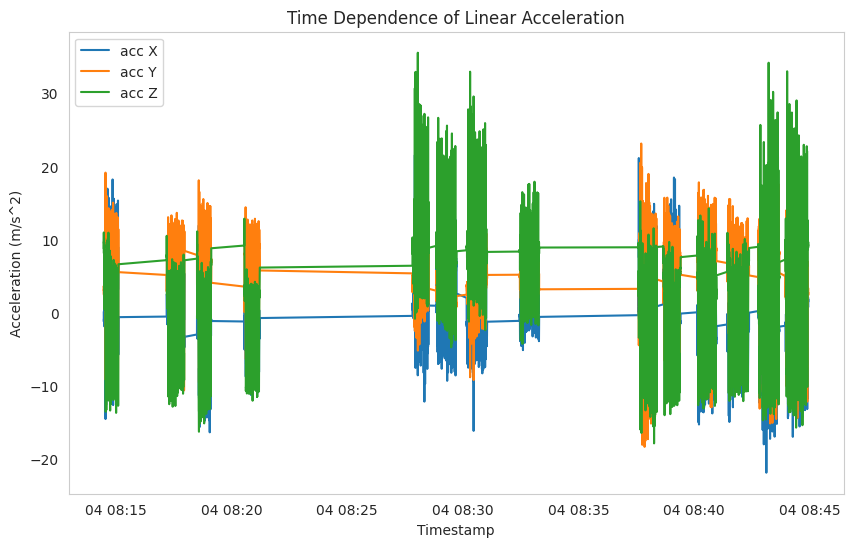

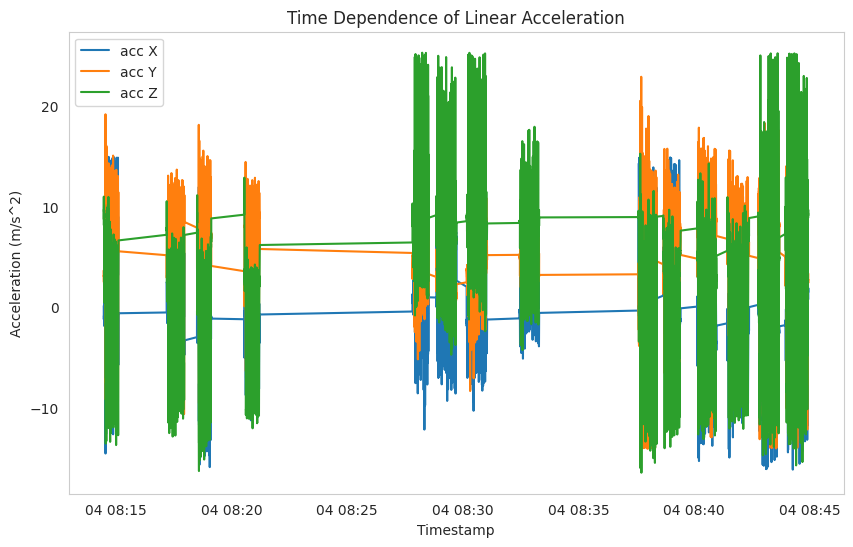

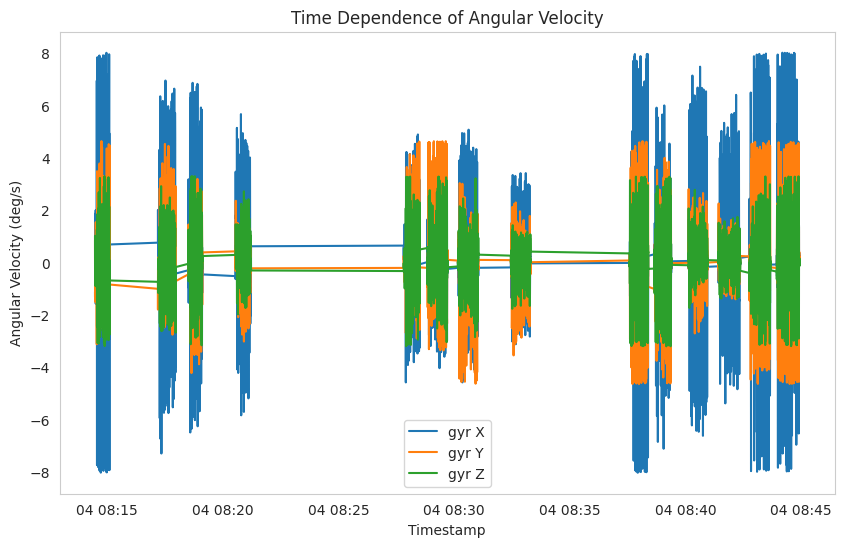

In [95]:
def detect_anomalies(data, threshold=6, plot=True):
    """
    Detect anomalies in the sensor data using Z-score.

    Parameters:
        data (pd.DataFrame): DataFrame containing sensor data.
                             It should have columns: 'timestamp', 'accX', 'accY', 'accZ', 'gyrX', 'gyrY', 'gyrZ'.
        threshold (float): Z-score threshold. Default is 3.
        plot (bool): Whether to plot the data with anomalies highlighted. Default is False.

    Returns:
        pd.DataFrame: DataFrame containing the anomalous rows.
    """

    numerical_columns = data.iloc[:, 2:-2]

    # Calculate the Z-score for each numerical column
    z_scores = np.abs((numerical_columns - numerical_columns.mean()) / numerical_columns.std())

    # Find rows where any column has a Z-score greater than the threshold
    anomaly_mask = (z_scores > threshold).any(axis=1)

    # Get the anomalies
    anomalies = data[anomaly_mask]

    # if plot:
    #     for acc in ['accX', 'accY', 'accZ']:
    #         plt.figure(figsize=(10, 6))
    #         plt.scatter(data['timestamp'], data[acc], label='Normal', color='blue', s=20)
    #         plt.scatter(anomalies['timestamp'], anomalies[acc], label='Anomaly', color='red', s=50)
    #         plt.xlabel('Timestamp')
    #         plt.ylabel('Acceleration (m/s^2)' if 'acc' in acc else 'Angular Velocity (deg/s)')
    #         plt.title('Anomaly Detection')
    #         plt.legend()
    #         plt.show()

    return anomalies


def replace_anomalies_with_mean(df, threshold=10):
    """
    Replace anomalies in the DataFrame with the mean of non-anomalous data for each numerical column.

    Parameters:
        df (pd.DataFrame): DataFrame containing sensor data.
                           It should have columns: 'timestamp', 'accX', 'accY', 'accZ', 'gyrX', 'gyrY', 'gyrZ'.
        threshold (float): Z-score threshold for anomaly detection. Default is 3.

    Returns:
        pd.DataFrame: DataFrame with anomalies replaced by mean values.
    """
    # Work with a copy of the data to avoid modifying the original DataFrame
    data = df[:]

    # Detect anomalies in the data
    anomalies = detect_anomalies(data, threshold)

    # Replace anomalies with the mean values for each numerical column
    numerical_columns = data.iloc[:, 2:-2]  # Excluding the timestamp and packet number columns
    column_means = numerical_columns.mean()

    for col in numerical_columns.columns:
        data.loc[data[col].isin(anomalies[col]), col] = column_means[col]

    return data


detect_anomalies(sensor_data_df)
plot_sensor_data(sensor_data_df,'acc')

sensor_data_df=replace_anomalies_with_mean(sensor_data_df,3)
plot_sensor_data(sensor_data_df,'acc')
plot_sensor_data(sensor_data_df,'gyr')


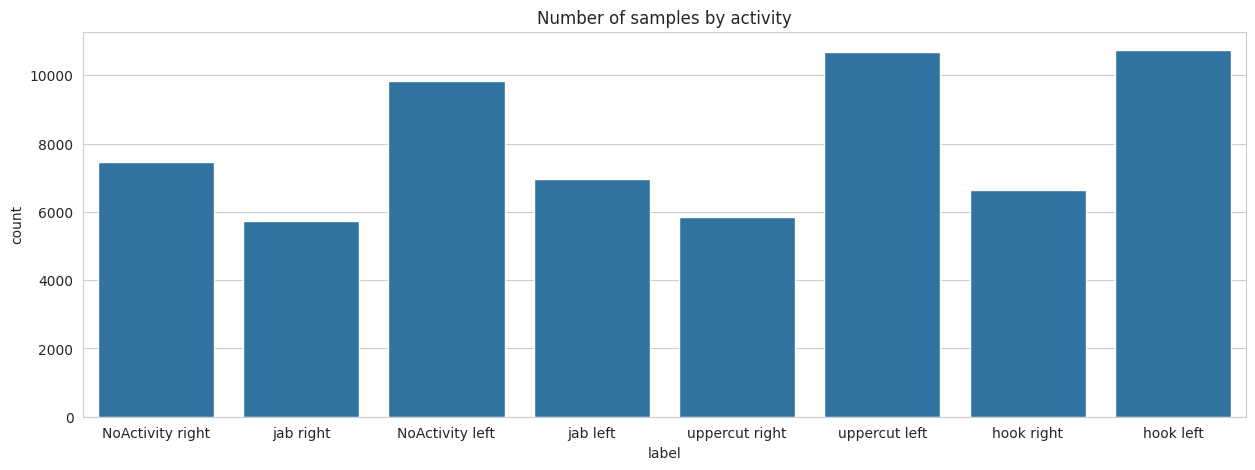

In [96]:
# проаналізуємо розподіл міток видів активностей
# Define a custom function to combine two columns
def combine_columns(row):
    return row['label'] + ' ' + row['hand']

# Apply the custom function to create a new column 'Combined'
sensor_data_df['label'] = sensor_data_df.apply(combine_columns, axis=1)
sensor_data_df = sensor_data_df.drop(columns=['hand'])

sns.set_style("whitegrid")
plt.figure(figsize=(15, 5))
sns.countplot(x='label', data=sensor_data_df)
plt.title('Number of samples by activity')
plt.show()

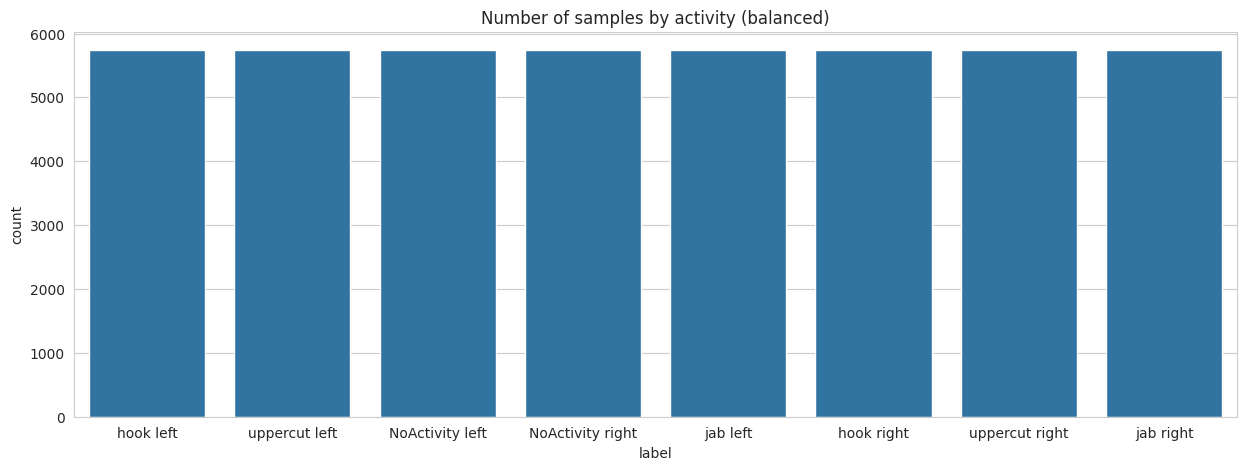

Shape after smote: 45928


In [97]:
# Assuming you have sensor_data_df defined somewhere
def balance_data_by_label(df, label_column):
    """
    Balance a DataFrame by a specified label column without data augmentation.

    Args:
        df (pd.DataFrame): The input DataFrame.
        label_column (str): The name of the label column.

    Returns:
        pd.DataFrame: A balanced DataFrame with equal or fewer samples for each label.
    """
    # Get unique labels and their counts
    label_counts = df[label_column].value_counts()

    # Determine the minimum count among labels
    min_count = label_counts.min()

    # Create an empty DataFrame to store balanced data
    balanced_df = pd.DataFrame()

    # Iterate through each unique label
    for label in label_counts.index:
        # Sample data for each label to match the minimum count
        label_data = df[df[label_column] == label].sample(n=min_count, random_state=42)

        # Append the sampled data to the balanced DataFrame
        balanced_df = pd.concat([balanced_df, label_data])

    return balanced_df


# Example usage:
# Assuming your DataFrame is named 'df' and the label column is named 'label'
sensor_data_df = balance_data_by_label(sensor_data_df, 'label')


# Check the balance of the classes
plt.figure(figsize=(15, 5))
sns.countplot(x='label', data=sensor_data_df)
plt.title('Number of samples by activity (balanced)')
plt.show()

print("Shape after smote:", len(sensor_data_df))

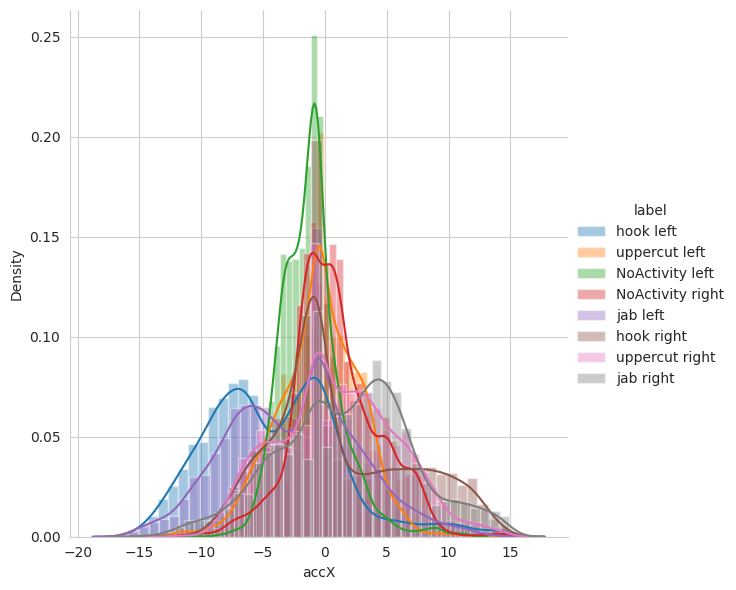

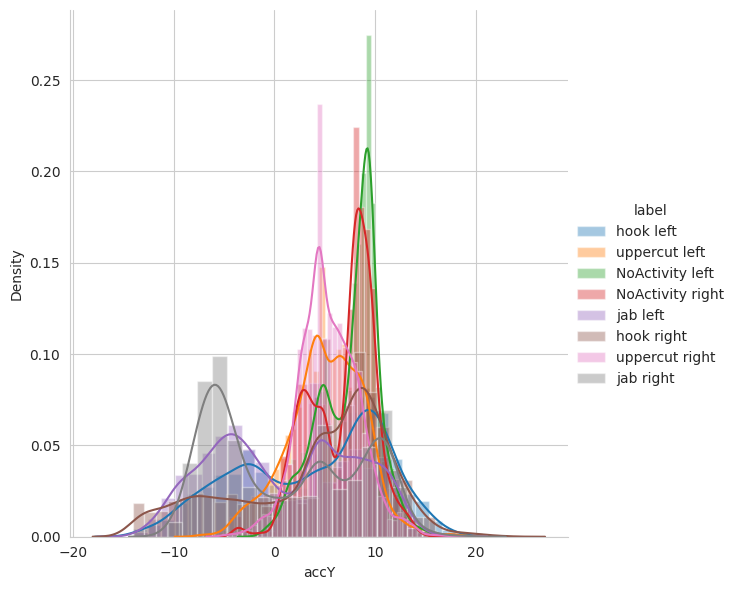

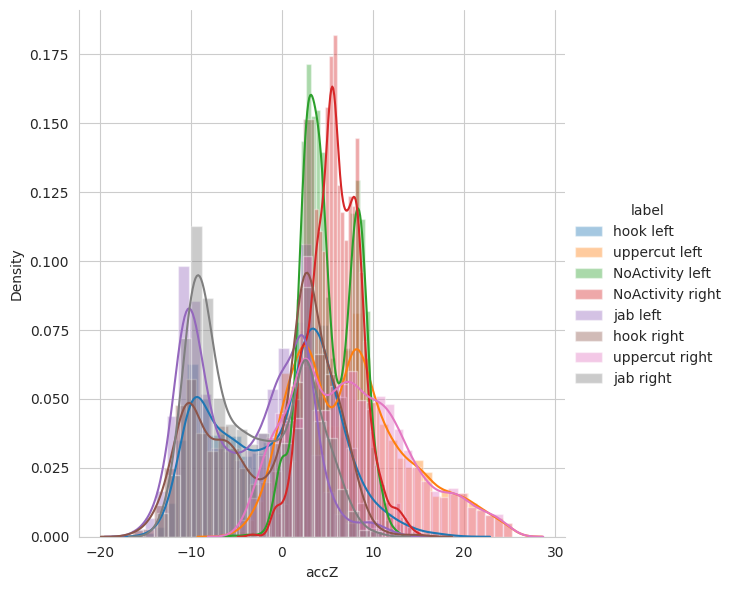

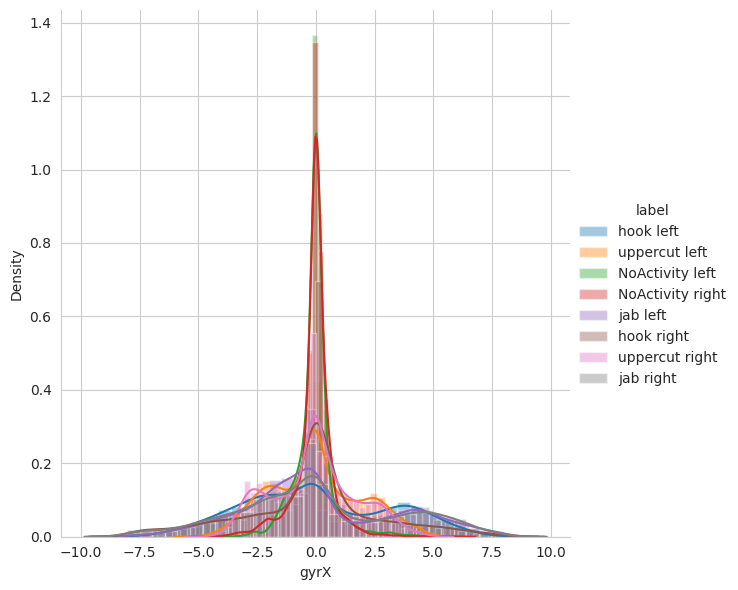

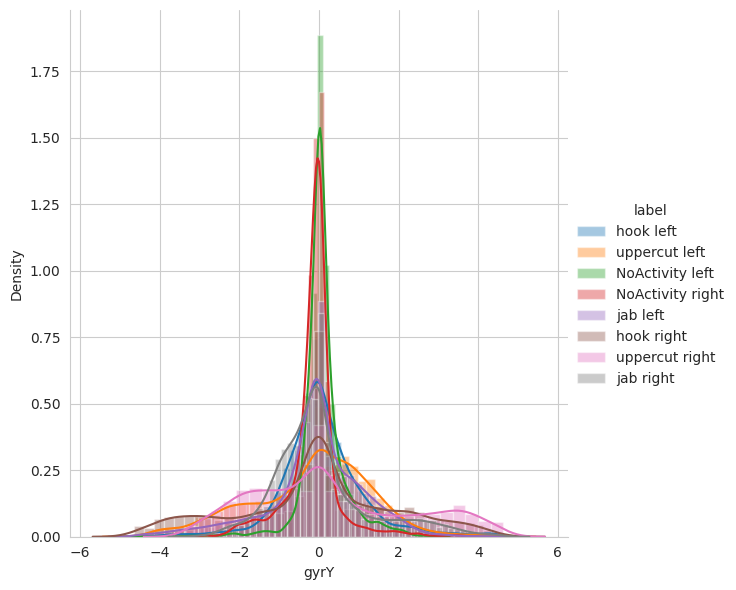

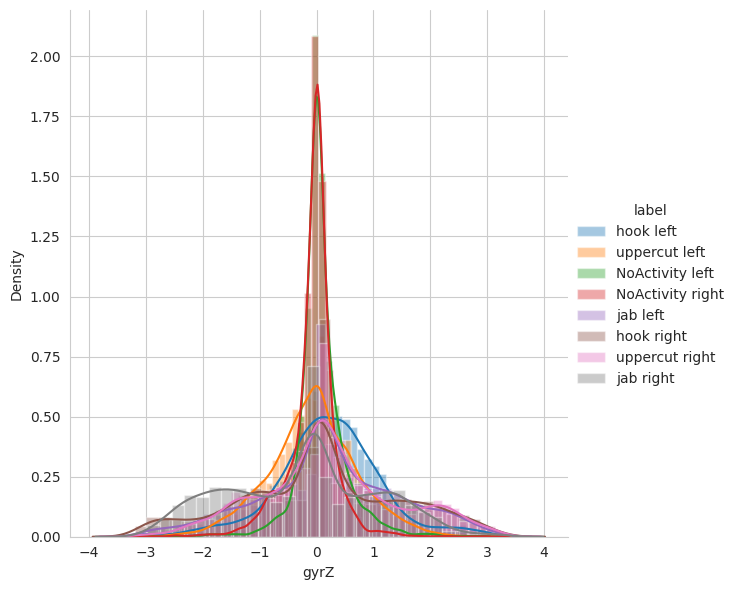

In [98]:
from scipy.integrate import simps

sns.FacetGrid(sensor_data_df, hue='label', height=6).map(sns.distplot, 'accX').add_legend()
sns.FacetGrid(sensor_data_df, hue='label', height=6).map(sns.distplot, 'accY').add_legend()
sns.FacetGrid(sensor_data_df, hue='label', height=6).map(sns.distplot, 'accZ').add_legend()
sns.FacetGrid(sensor_data_df, hue='label', height=6).map(sns.distplot, 'gyrX').add_legend()
sns.FacetGrid(sensor_data_df, hue='label', height=6).map(sns.distplot, 'gyrY').add_legend()
sns.FacetGrid(sensor_data_df, hue='label', height=6).map(sns.distplot, 'gyrZ').add_legend()

In [99]:
from scipy.signal import find_peaks
import numpy as np
import pandas as pd

def extract_features(sensor_data_df):
    x_list = []
    y_list = []
    z_list = []

    x_gyr_list = []
    y_gyr_list = []
    z_gyr_list = []

    train_labels = []

    window_size = 200
    step_size = 100

    i = 0
    while i <= sensor_data_df.shape[0] - window_size and i + window_size <= sensor_data_df.shape[0]:
        xs = sensor_data_df['accX'].values[i: i + window_size]
        ys = sensor_data_df['accY'].values[i: i + window_size]
        zs = sensor_data_df['accZ'].values[i: i + window_size]

        xg = sensor_data_df['gyrX'].values[i: i + window_size]
        yg = sensor_data_df['gyrY'].values[i: i + window_size]
        zg = sensor_data_df['gyrZ'].values[i: i + window_size]

        # Using pandas mode
        label = sensor_data_df['label'][i: i + window_size].mode()[0]

        x_list.append(xs)
        y_list.append(ys)
        z_list.append(zs)

        x_gyr_list.append(xg)
        y_gyr_list.append(yg)
        z_gyr_list.append(zg)

        train_labels.append(label)
        i = i + step_size

    # Statistical Features on raw x, y and z in the time domain
    X_train = pd.DataFrame()

    # Mean
    X_train['x_acc_mean'] = pd.Series(x_list).apply(lambda x: x.mean())
    X_train['y_acc_mean'] = pd.Series(y_list).apply(lambda x: x.mean())
    X_train['z_acc_mean'] = pd.Series(z_list).apply(lambda x: x.mean())

    X_train['x_gyr_mean'] = pd.Series(x_gyr_list).apply(lambda x: x.mean())
    X_train['y_gyr_mean'] = pd.Series(y_gyr_list).apply(lambda x: x.mean())
    X_train['z_gyr_mean'] = pd.Series(z_gyr_list).apply(lambda x: x.mean())

    # std dev
    X_train['x_acc_std'] = pd.Series(x_list).apply(lambda x: x.std())
    X_train['y_acc_std'] = pd.Series(y_list).apply(lambda x: x.std())
    X_train['z_acc_std'] = pd.Series(z_list).apply(lambda x: x.std())

    X_train['x_gyr_std'] = pd.Series(x_gyr_list).apply(lambda x: x.std())
    X_train['y_gyr_std'] = pd.Series(y_gyr_list).apply(lambda x: x.std())
    X_train['z_gyr_std'] = pd.Series(z_gyr_list).apply(lambda x: x.std())


    # avg absolute diff
    X_train['x_acc_aad'] = pd.Series(x_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
    X_train['y_acc_aad'] = pd.Series(y_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
    X_train['z_acc_aad'] = pd.Series(z_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

    X_train['x_gyr_aad'] = pd.Series(x_gyr_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
    X_train['y_gyr_aad'] = pd.Series(y_gyr_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
    X_train['z_gyr_aad'] = pd.Series(z_gyr_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))


    # min
    X_train['x_acc_min'] = pd.Series(x_list).apply(lambda x: x.min())
    X_train['y_acc_min'] = pd.Series(y_list).apply(lambda x: x.min())
    X_train['z_acc_min'] = pd.Series(z_list).apply(lambda x: x.min())

    X_train['x_gyr_min'] = pd.Series(x_gyr_list).apply(lambda x: x.min())
    X_train['y_gyr_min'] = pd.Series(y_gyr_list).apply(lambda x: x.min())
    X_train['z_gyr_min'] = pd.Series(y_gyr_list).apply(lambda x: x.min())

    # max
    X_train['x_acc_max'] = pd.Series(x_list).apply(lambda x: x.max())
    X_train['y_acc_max'] = pd.Series(y_list).apply(lambda x: x.max())
    X_train['z_acc_max'] = pd.Series(z_list).apply(lambda x: x.max())

    X_train['x_gyr_max'] = pd.Series(x_gyr_list).apply(lambda x: x.max())
    X_train['y_gyr_max'] = pd.Series(y_gyr_list).apply(lambda x: x.max())
    X_train['z_gyr_max'] = pd.Series(z_gyr_list).apply(lambda x: x.max())

    # max-min diff
    X_train['x_acc_maxmin_diff'] = X_train['x_acc_max'] - X_train['x_acc_min']
    X_train['y_acc_maxmin_diff'] = X_train['y_acc_max'] - X_train['y_acc_min']
    X_train['z_acc_maxmin_diff'] = X_train['z_acc_max'] - X_train['z_acc_min']

    X_train['x_gyr_maxmin_diff'] = X_train['x_gyr_max'] - X_train['x_gyr_min']
    X_train['y_gyr_maxmin_diff'] = X_train['y_gyr_max'] - X_train['y_gyr_min']
    X_train['z_gyr_maxmin_diff'] = X_train['z_gyr_max'] - X_train['z_gyr_min']

    # median
    X_train['x_acc_median'] = pd.Series(x_list).apply(lambda x: np.median(x))
    X_train['y_acc_median'] = pd.Series(y_list).apply(lambda x: np.median(x))
    X_train['z_acc_median'] = pd.Series(z_list).apply(lambda x: np.median(x))

    X_train['x_gyr_median'] = pd.Series(x_gyr_list).apply(lambda x: np.median(x))
    X_train['y_gyr_median'] = pd.Series(y_gyr_list).apply(lambda x: np.median(x))
    X_train['z_gyr_median'] = pd.Series(z_gyr_list).apply(lambda x: np.median(x))

    # median abs dev
    X_train['x_acc_mad'] = pd.Series(x_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
    X_train['y_acc_mad'] = pd.Series(y_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
    X_train['z_acc_mad'] = pd.Series(z_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))

    X_train['x_gyr_mad'] = pd.Series(x_gyr_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
    X_train['y_gyr_mad'] = pd.Series(y_gyr_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
    X_train['z_gyr_mad'] = pd.Series(z_gyr_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))

    # interquartile range
    X_train['x_acc_IQR'] = pd.Series(x_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
    X_train['y_acc_IQR'] = pd.Series(y_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
    X_train['z_acc_IQR'] = pd.Series(z_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

    X_train['x_gyr_IQR'] = pd.Series(x_gyr_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
    X_train['y_gyr_IQR'] = pd.Series(y_gyr_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
    X_train['z_gyr_IQR'] = pd.Series(z_gyr_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

    # number of peaks
    X_train['x_acc_peak_count'] = pd.Series(x_list).apply(lambda x: len(find_peaks(x)[0]))
    X_train['y_acc_peak_count'] = pd.Series(y_list).apply(lambda x: len(find_peaks(x)[0]))
    X_train['z_acc_peak_count'] = pd.Series(z_list).apply(lambda x: len(find_peaks(x)[0]))

    X_train['x_gyr_peak_count'] = pd.Series(x_gyr_list).apply(lambda x: len(find_peaks(x)[0]))
    X_train['y_gyr_peak_count'] = pd.Series(y_gyr_list).apply(lambda x: len(find_peaks(x)[0]))
    X_train['z_gyr_peak_count'] = pd.Series(z_gyr_list).apply(lambda x: len(find_peaks(x)[0]))

    X_train['label'] = pd.Series(train_labels)

    return X_train


shape sensor_data_df before: (45928, 9)
shape sensor_data_df after extract_features: (458, 61)


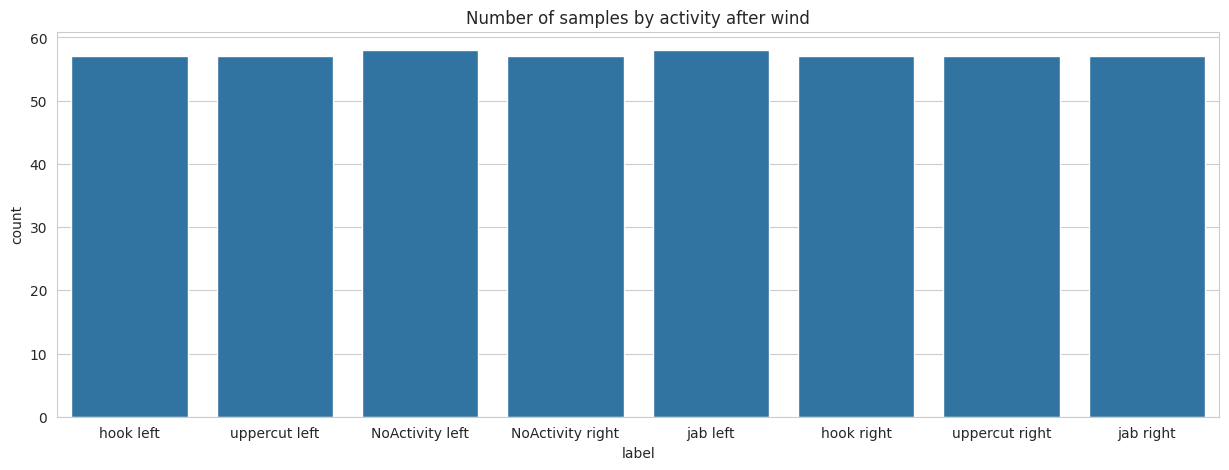

df_train (320, 61)
df_test (138, 61)


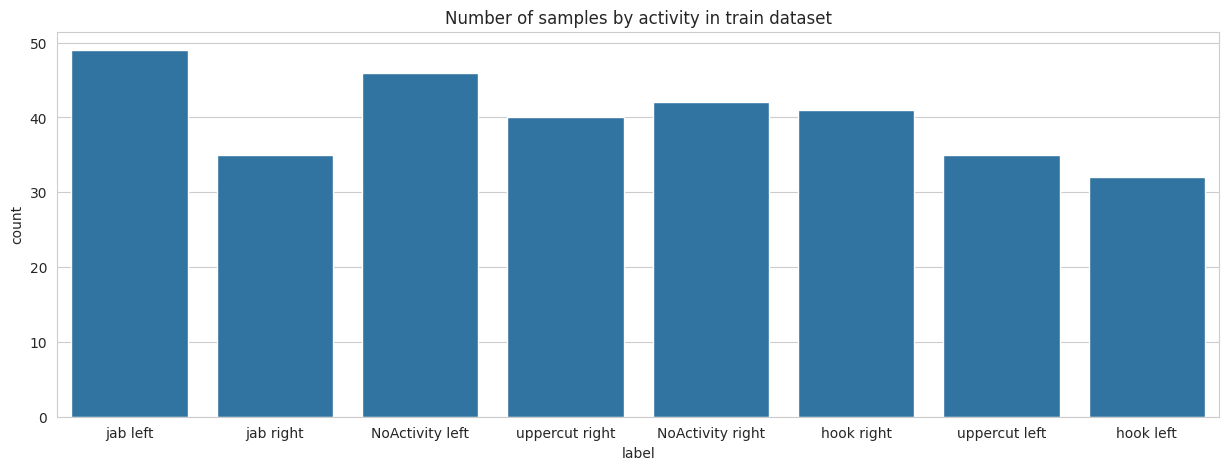

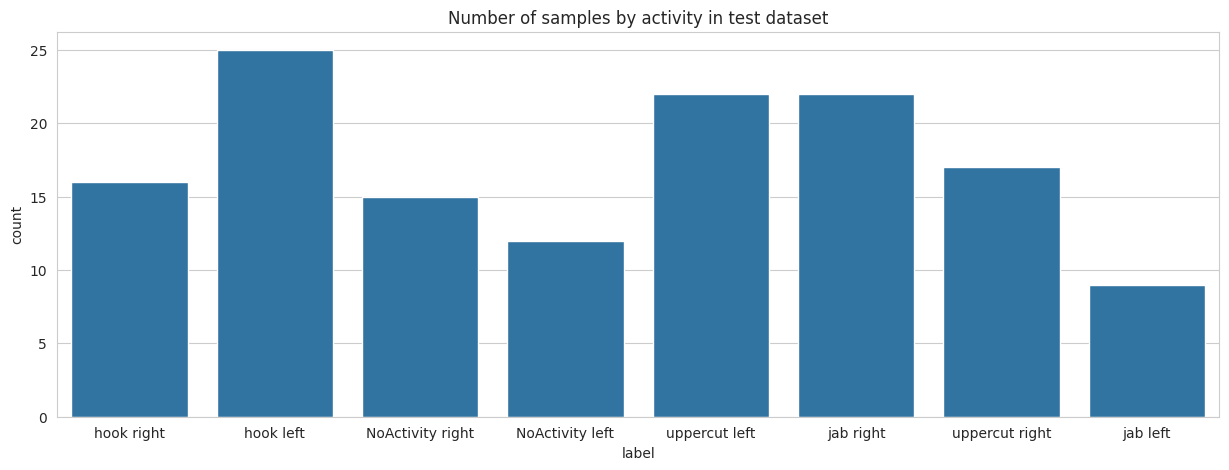

In [100]:
# Assuming you have sensor_data_df defined somewhere
print("shape sensor_data_df before:", sensor_data_df.shape)
data_df = extract_features(sensor_data_df)
print("shape sensor_data_df after extract_features:", data_df.shape)

plt.figure(figsize=(15, 5))
sns.countplot(x='label', data=data_df)
plt.title('Number of samples by activity after wind')
plt.show()

df_train, df_test, = train_test_split(data_df, test_size=0.3, random_state=42)
print("df_train", df_train.shape)
print("df_test", df_test.shape)
sns.set_style("whitegrid")

plt.figure(figsize=(15, 5))
sns.countplot(x='label', data=df_train)
plt.title('Number of samples by activity in train dataset')
plt.show()

plt.figure(figsize=(15, 5))
sns.countplot(x='label', data=df_test)
plt.title('Number of samples by activity in test dataset')
plt.show()

In [101]:
# =============================================================================
#  standardization
scaler = StandardScaler()
X_train_data_nor = scaler.fit_transform(df_train.iloc[:, :-1])
X_train_data_nor = pd.DataFrame(X_train_data_nor, columns=df_train.columns[:-1])

X_test_data_nor = scaler.fit_transform(df_test.iloc[:, :-1])
X_test_data_nor = pd.DataFrame(X_test_data_nor, columns=df_test.columns[:-1])

Y_train = df_train.iloc[:, -1]
Y_train = pd.DataFrame(Y_train, columns=["label"])
Y_test = df_test.iloc[:, -1]
Y_test = pd.DataFrame(Y_test, columns=["label"])

label_mapping = {
    'hook right': 0,
    'hook left': 1,
    'uppercut left': 2,
    'uppercut right': 3,
    'jab left': 4,
    'jab right': 5,
    'NoActivity left': 6,
    'NoActivity right': 7
}

# Convert labels to integers
Y_train['label'] = Y_train['label'].map(label_mapping)
Y_test['label'] = Y_test['label'].map(label_mapping)

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

def feature_importance_random_forest(X_train_data_nor, Y_train, df_train):
    # Create a Random Forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

    # Train the Random Forest classifier
    rf_classifier.fit(X_train_data_nor, Y_train['label'])

    # Get feature importances from the trained model
    feature_importances = rf_classifier.feature_importances_

    # Sort feature importances in descending order
    sorted_indices = np.argsort(feature_importances)[::-1]

    # Get feature names from the original dataset
    feature_names = df_train.columns[:-1]  # Exclude the 'label' column

    # Plot feature importances
    plt.figure(figsize=(10, 6))
    plt.bar(range(X_train_data_nor.shape[1]), feature_importances[sorted_indices])
    plt.xticks(range(X_train_data_nor.shape[1]), np.array(feature_names)[sorted_indices], rotation=90)
    plt.xlabel('Feature')
    plt.ylabel('Feature Importance')
    plt.title('Feature selection with Random Forest')
    plt.tight_layout()
    plt.show()

    return feature_names

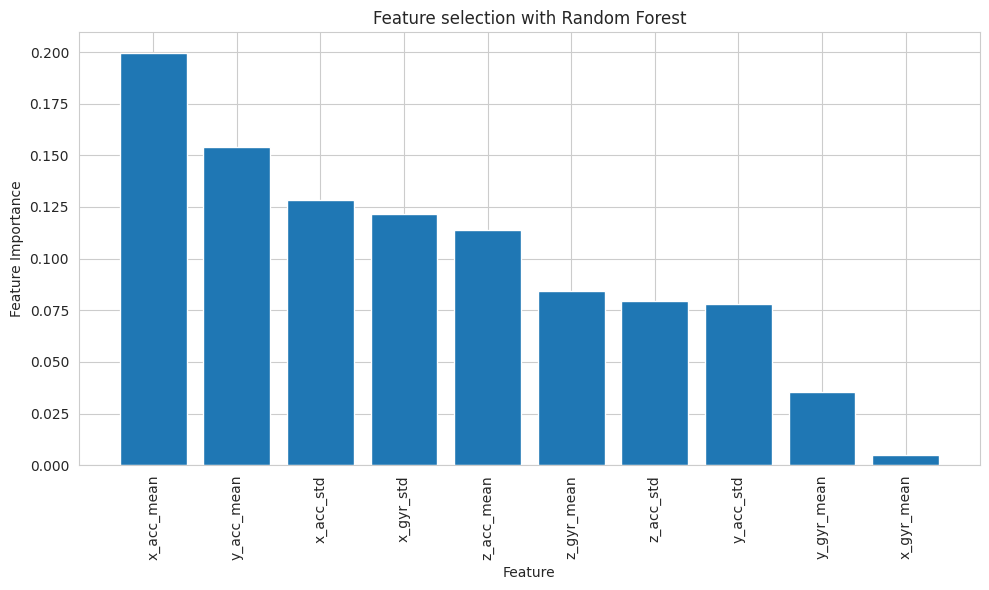

Epoch 1/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.0971 - loss: 2.1438 - val_accuracy: 0.1250 - val_loss: 1.9377
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1760 - loss: 1.8714 - val_accuracy: 0.4219 - val_loss: 1.7074
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5353 - loss: 1.6395 - val_accuracy: 0.7812 - val_loss: 1.5114
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7248 - loss: 1.4511 - val_accuracy: 0.7656 - val_loss: 1.3407
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7669 - loss: 1.2623 - val_accuracy: 0.7344 - val_loss: 1.1764
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7849 - loss: 1.1288 - val_accuracy: 0.7812 - val_loss: 1.0208
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8604 - loss: 0.9357 - val_accuracy: 0.8281 - val_loss: 0.8728
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8397 - loss: 0.8432 - val_accuracy: 0.9062 - val_loss: 0.7385
Epoch

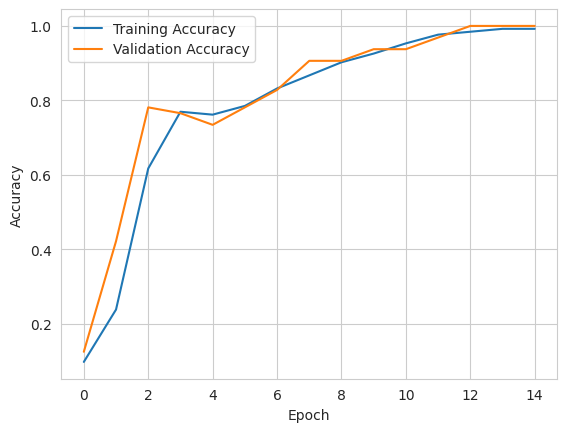

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9921 - loss: 0.2450  
Test accuracy: 0.9855072498321533
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
                  precision    recall  f1-score   support

 NoActivity left       1.00      1.00      1.00        12
NoActivity right       0.94      1.00      0.97        15
       hook left       1.00      0.96      0.98        25
      hook right       1.00      1.00      1.00        16
        jab left       0.90      1.00      0.95         9
       jab right       1.00      1.00      1.00        22
   uppercut left       1.00      0.95      0.98        22
  uppercut right       1.00      1.00      1.00        17

        accuracy                           0.99       138
       macro avg       0.98      0.99      0.98       138
    weighted avg       0.99      0.99      0.99       138

Confusion Matrix:
[[12  0  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0  0]
 [ 0  0 24  0  1  0  0  0]
 [ 0  0  0 16  0  0  0  0]
 [ 0  0  0  0  9  0  0  0]
 [ 

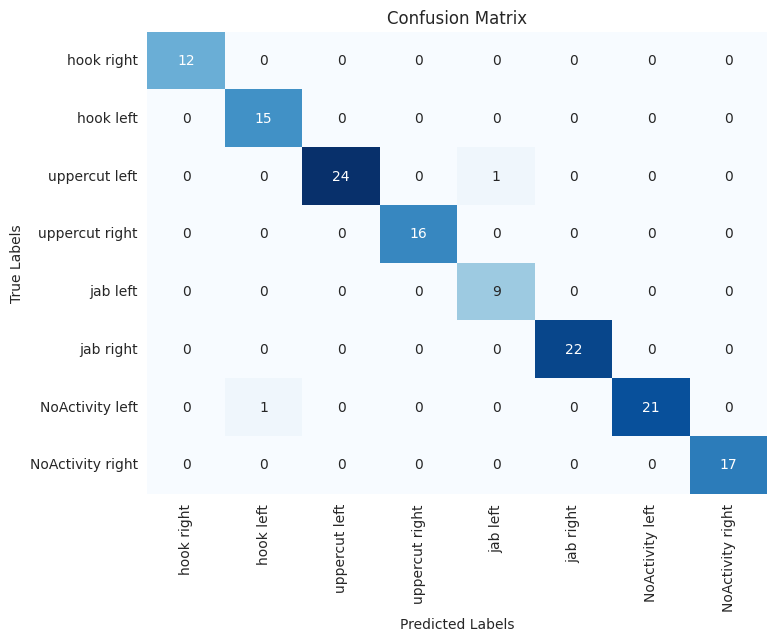

In [110]:
selected_features_rf = feature_importance_random_forest(X_train_data_nor, Y_train, df_train)

X_train_data_nor=X_train_data_nor[selected_features_rf[:10]]
X_test_data_nor=X_test_data_nor[selected_features_rf[:10]]
# Define the neural network architecture
model = keras.Sequential([

    layers.Input(shape=(X_train_data_nor.shape[1],)),  # Input layer for features
    layers.Dense(64, activation='relu'),  # Fully connected layer with 128 units and ReLU activation
    # layers.Dropout(0.4),  # Dropout layer to prevent overfitting
    layers.Dense(32, activation='relu'),  # Fully connected layer with 64 units and ReLU activation
    # layers.Dropout(0.4),  # Dropout layer to prevent overfitting
    layers.Dense(len(label_mapping), activation='softmax')  # Output layer with softmax activation for activity classification
 ])



 # Compile the model
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

 # Train the model
history=model.fit(X_train_data_nor, Y_train, epochs=15, validation_split=0.2, batch_size=32)

# # Save the model to a file
model.save('model.h5')

# # Plot training and validation accuracy over epochs
fig = plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# # Evaluate the model
loss, accuracy = model.evaluate(X_test_data_nor, Y_test)
print("Test accuracy:", accuracy)


# Get predictions from the model
y_pred = model.predict(X_test_data_nor)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert integer labels back to original labels using numpy indexing
reverse_label_mapping = {v: k for k, v in label_mapping.items()}
y_test_original = np.vectorize(reverse_label_mapping.get)(Y_test)
y_pred_original = np.vectorize(reverse_label_mapping.get)(y_pred_classes)

# Print the classification report
print(classification_report(y_test_original, y_pred_original))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_original, y_pred_original)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)
class_names = ['hook right', 'hook left', 'uppercut left', 'uppercut right', 'jab left', 'jab right', 'NoActivity left', 'NoActivity right']
# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names,cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()